In [ ]:
!pip install mediapipe

# Analizar video desde Camara en tiempo real

In [ ]:
import cv2
import mediapipe as mp

# Initializing Hand Tracking Modules
mpHands = mp.solutions.hands
Hands = mpHands.Hands()
mpDraw = mp.solutions.drawing_utils


# Capturing Video From Camera 
cap = cv2.VideoCapture(0)

# Checking Camera is Opened or Not 
while (cap.isOpened()):
    success , img = cap.read() # reading Frame 
    converted_image = cv2.cvtColor(img,cv2.COLOR_BGR2RGB) # converting BGR to RGB
    results = Hands.process(converted_image) # Processing Image for Tracking 

    if results.multi_hand_landmarks: # Getting Landmark(location) of Hands if Exists 
        for hand_in_frame in results.multi_hand_landmarks: # looping through hands exists in the Frame 
            mpDraw.draw_landmarks(img,hand_in_frame, mpHands.HAND_CONNECTIONS) # drawing Hand Connections   

    cv2.imshow("Prueba Franco", img) # showing Video 

    if cv2.waitKey(1) == 113: # 113 - Q : press on Q : Close Video 
        break

In [ ]:
!pip install --upgrade pip

# Analizar una lista de imagenes

Nose coordinates: (292.31714326143265, 296.91224122047424)


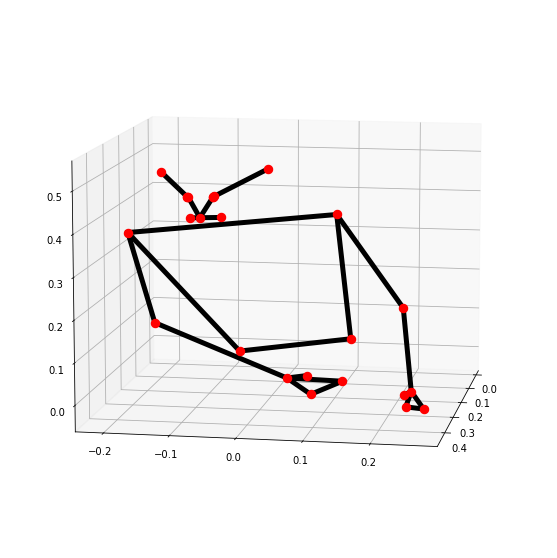

<class 'NoneType'>
Nose coordinates: (289.42705857753754, 296.1799011230469)


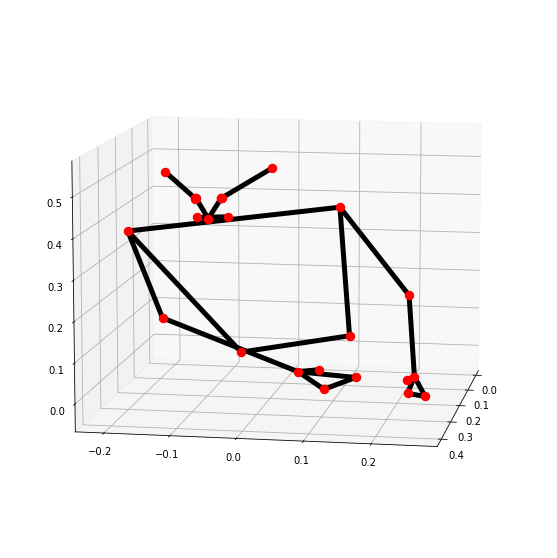

<class 'NoneType'>
Nose coordinates: (287.87366539239883, 301.74569821357727)


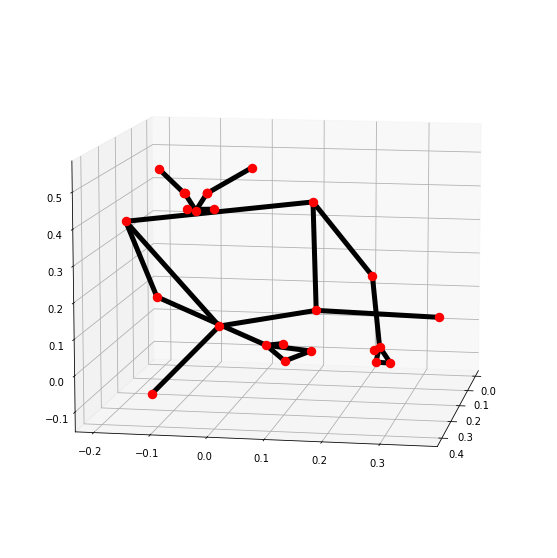

<class 'NoneType'>
Nose coordinates: (294.0452515780926, 300.04007613658905)


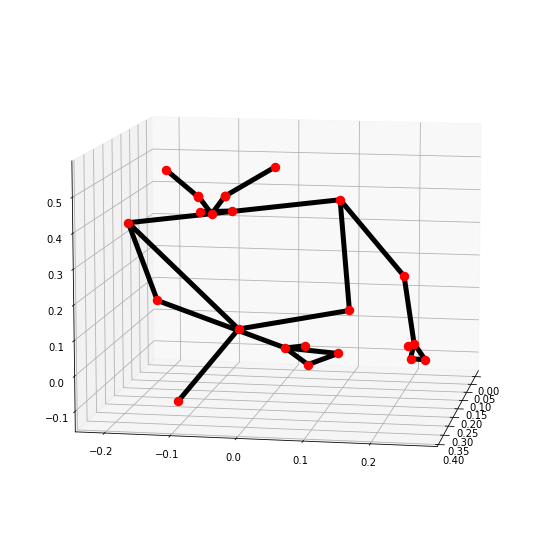

<class 'NoneType'>
Nose coordinates: (267.3961133956909, 189.11410629749298)


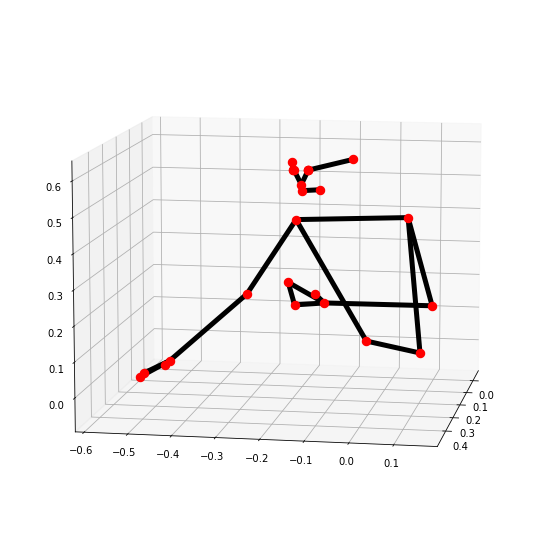

<class 'NoneType'>
Nose coordinates: (253.48796719312668, 182.35416412353516)


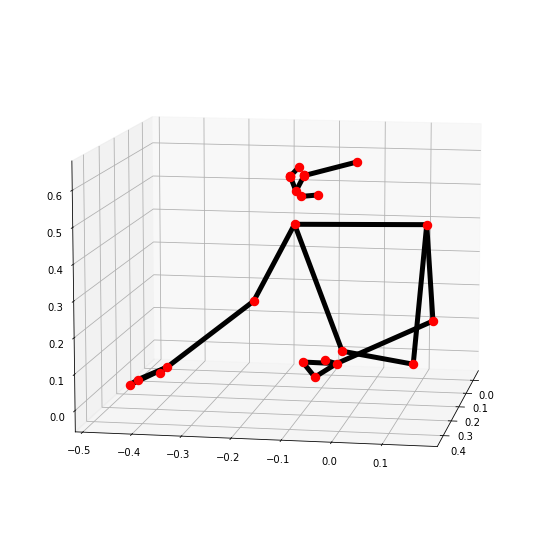

<class 'mediapipe.framework.formats.landmark_pb2.NormalizedLandmarkList'>
Nose coordinates: (258.5209596455097, 184.61124539375305)


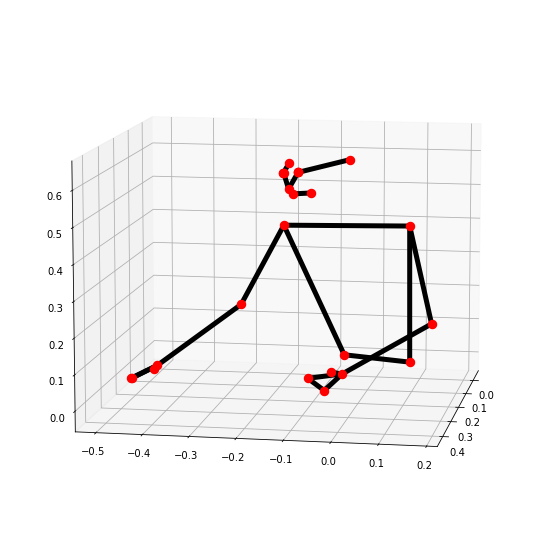

<class 'mediapipe.framework.formats.landmark_pb2.NormalizedLandmarkList'>
Nose coordinates: (267.40487575531006, 192.48290494084358)


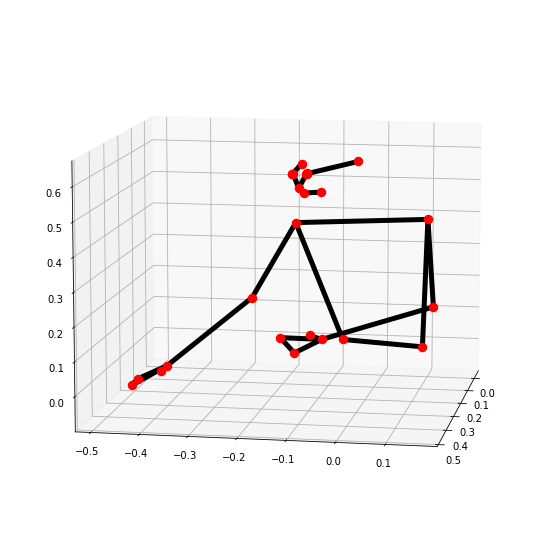

<class 'NoneType'>
Nose coordinates: (243.69210773706436, 187.4041564464569)


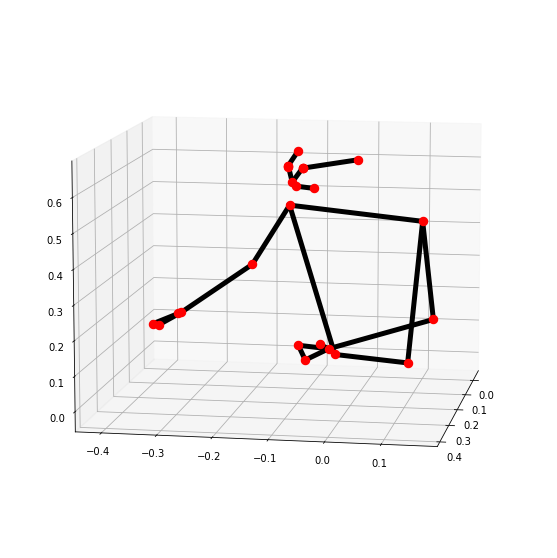

<class 'NoneType'>
Nose coordinates: (247.05382120609283, 195.54263278841972)


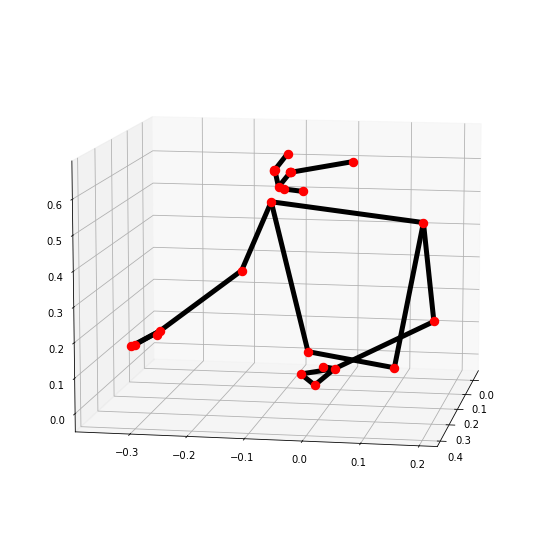

<class 'mediapipe.framework.formats.landmark_pb2.NormalizedLandmarkList'>
Nose coordinates: (239.787513256073, 192.75769144296646)


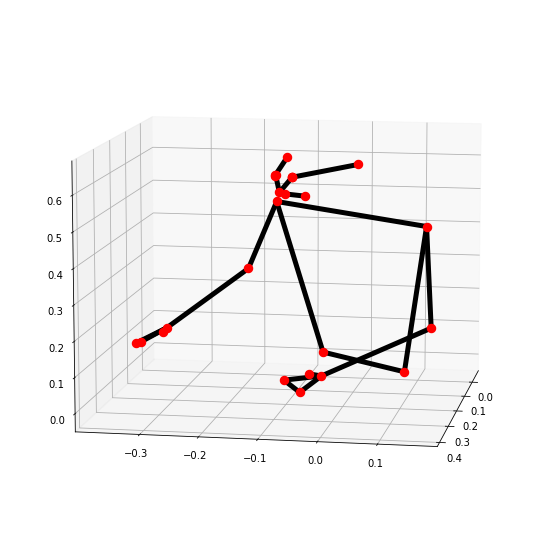

<class 'NoneType'>
Nose coordinates: (242.734514772892, 190.75193479657173)


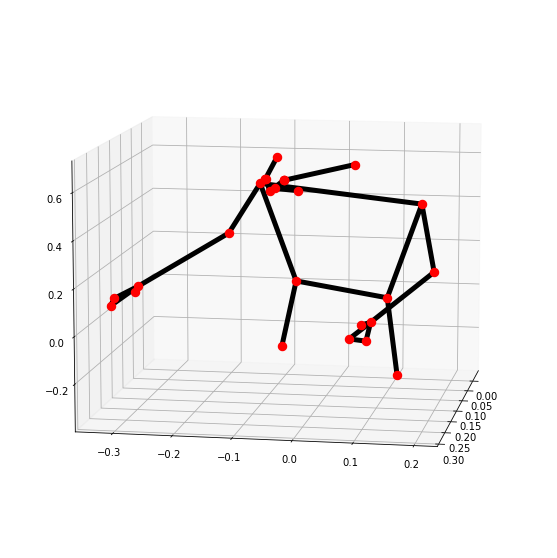

<class 'NoneType'>
Nose coordinates: (300.85354804992676, 205.19092532992363)


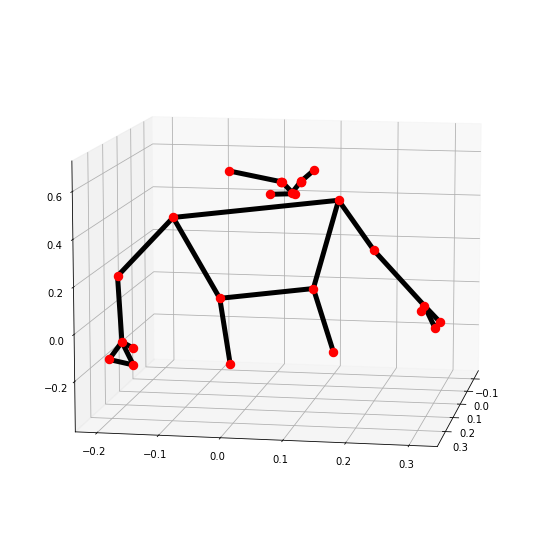

<class 'mediapipe.framework.formats.landmark_pb2.NormalizedLandmarkList'>
Nose coordinates: (298.155734539032, 203.1226636171341)


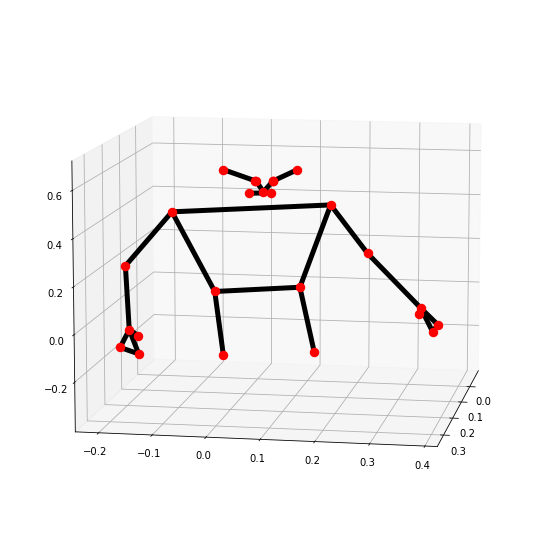

<class 'NoneType'>
Nose coordinates: (298.7993960380554, 205.47647202014923)


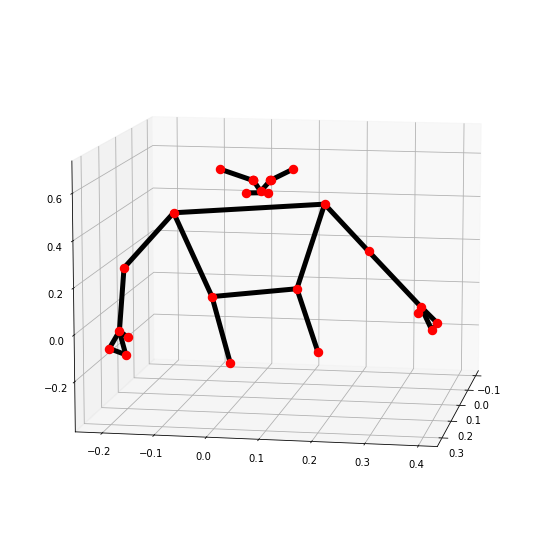

<class 'NoneType'>
Nose coordinates: (295.73090040683746, 210.4042072892189)


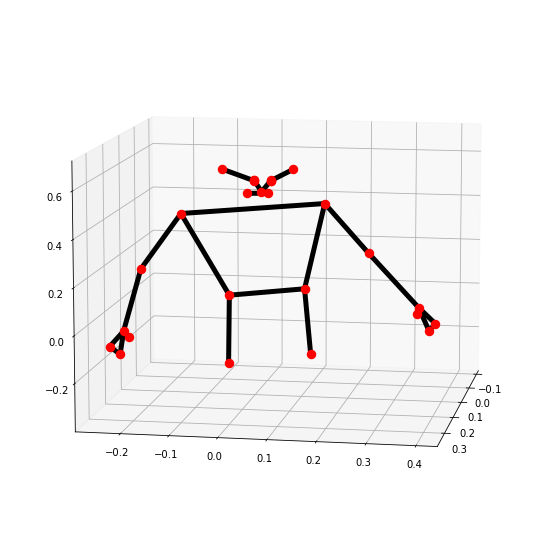

<class 'NoneType'>
Nose coordinates: (267.84668335318565, 208.3449343442917)


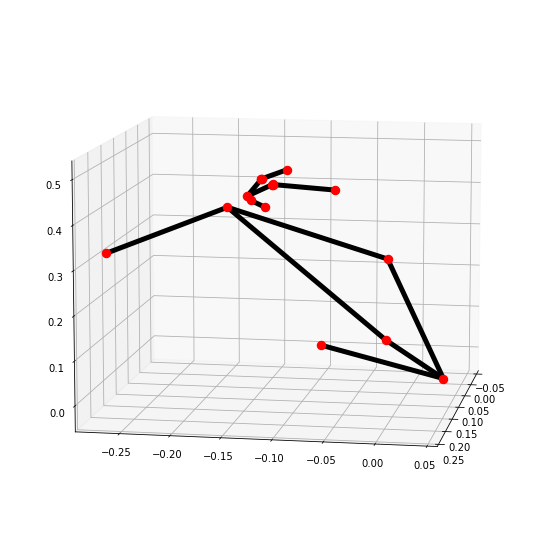

<class 'NoneType'>
Nose coordinates: (302.91615158319473, 193.90488201379776)


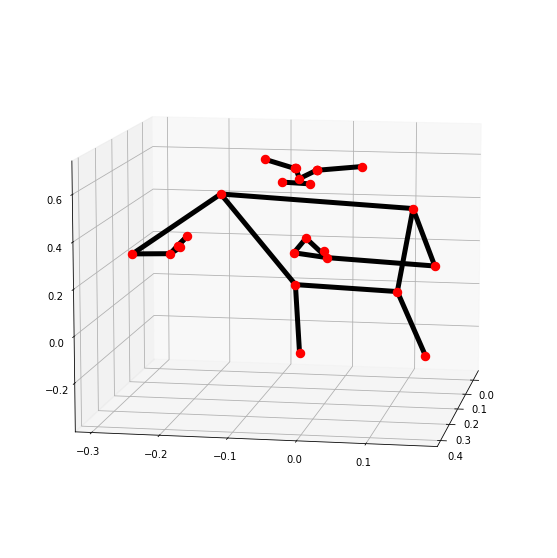

<class 'mediapipe.framework.formats.landmark_pb2.NormalizedLandmarkList'>
Nose coordinates: (299.5799632072449, 183.8239865899086)


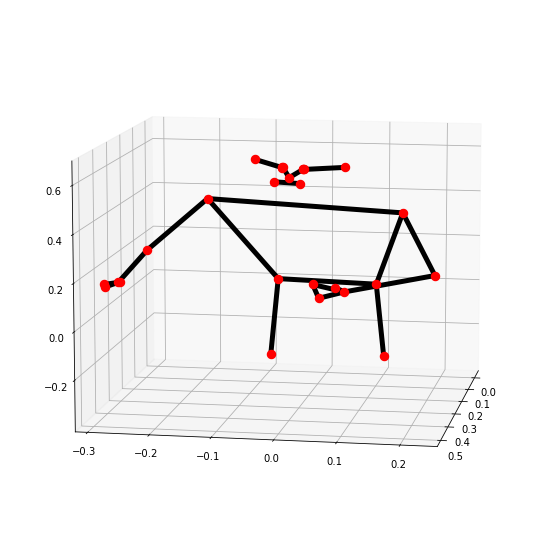

<class 'mediapipe.framework.formats.landmark_pb2.NormalizedLandmarkList'>
Nose coordinates: (287.85006523132324, 190.50908535718918)


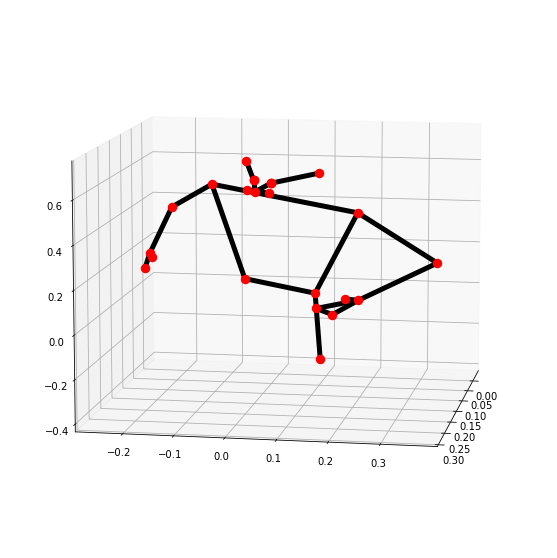

<class 'mediapipe.framework.formats.landmark_pb2.NormalizedLandmarkList'>
Nose coordinates: (286.93240237236023, 268.7183491587639)


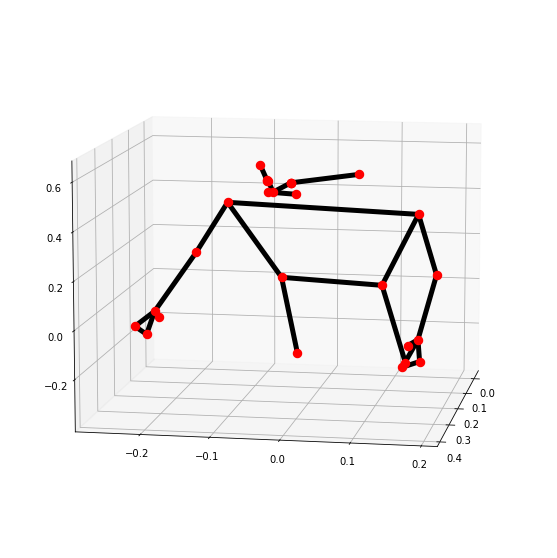

<class 'NoneType'>
Nose coordinates: (286.0967448055744, 278.0274559557438)


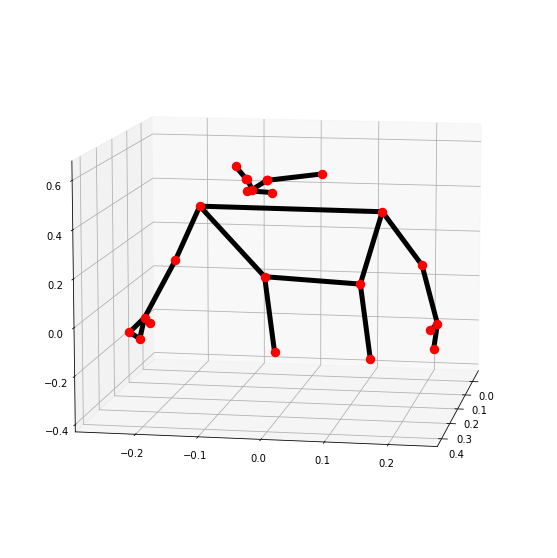

<class 'NoneType'>
Nose coordinates: (264.3753577172756, 265.2183283865452)


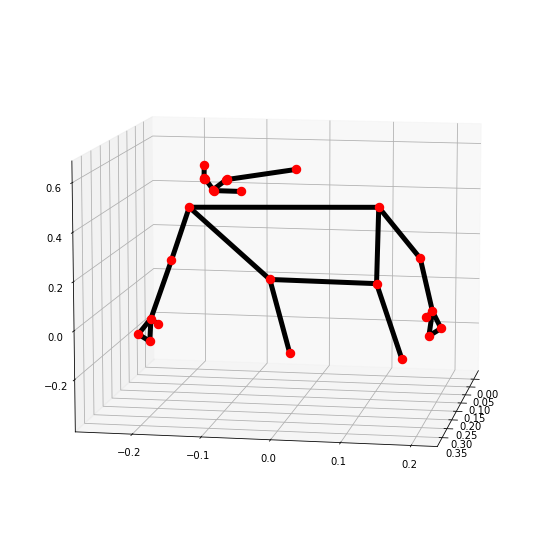

<class 'NoneType'>
Nose coordinates: (254.25292700529099, 268.9940468966961)


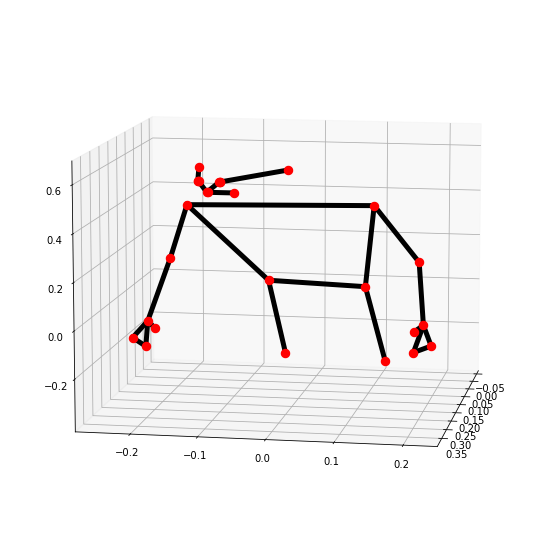

<class 'NoneType'>
Nose coordinates: (273.22836220264435, 245.91452917456627)


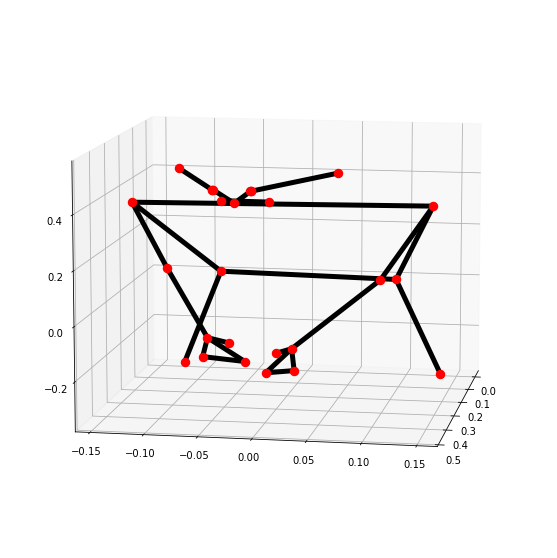

<class 'NoneType'>
Nose coordinates: (263.20562267303467, 248.95023727416992)


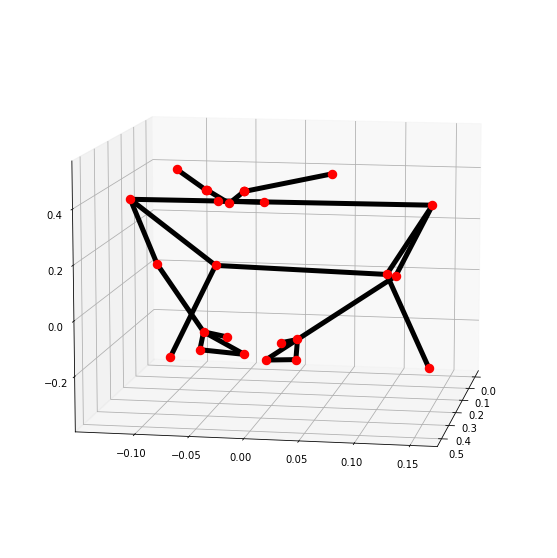

<class 'NoneType'>
Nose coordinates: (244.7398931980133, 225.85005569458008)


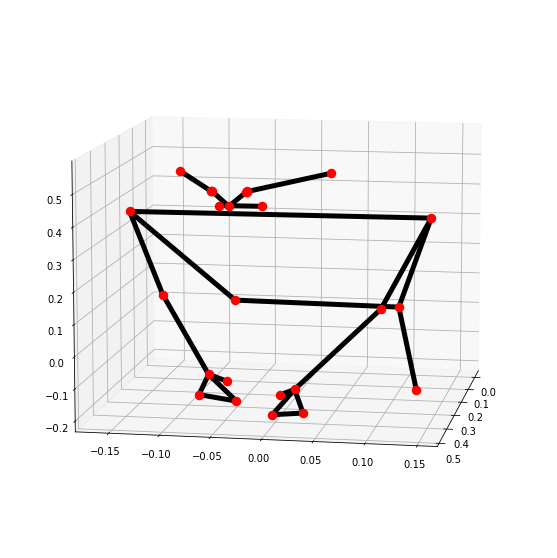

<class 'NoneType'>
Nose coordinates: (329.64251375198364, 279.7464904785156)


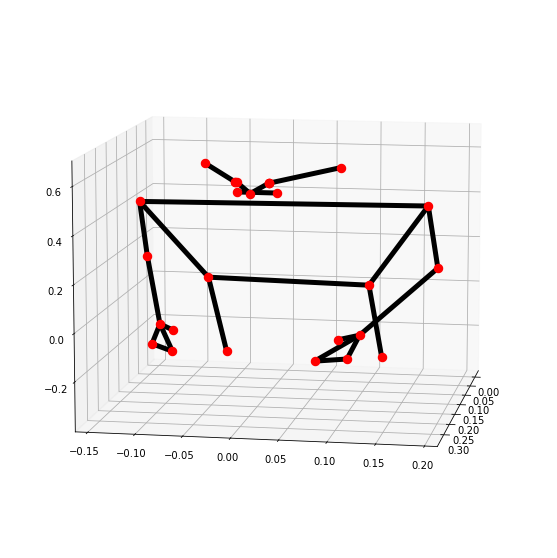

<class 'mediapipe.framework.formats.landmark_pb2.NormalizedLandmarkList'>
Nose coordinates: (306.7415136694908, 279.4202971458435)


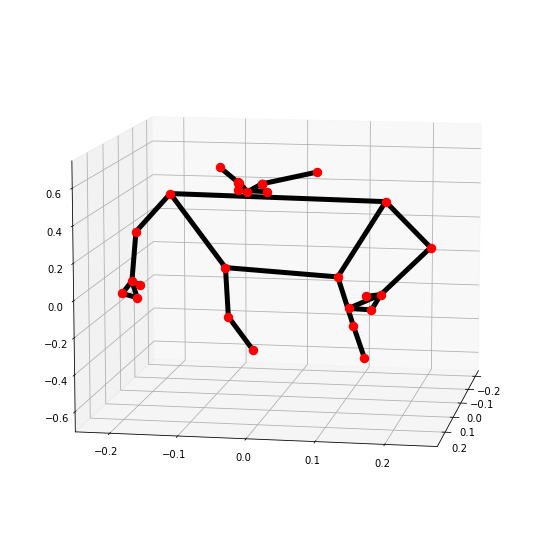

<class 'mediapipe.framework.formats.landmark_pb2.NormalizedLandmarkList'>


In [2]:
import mediapipe as mp
import numpy as np
import PIL.Image as Image
import cv2
mp_holistic = mp.solutions.holistic
ruta="C:/Users/Franco/Downloads/hand_dataset/training_dataset/training_data/images/Hands-Dataset/"
imagen1=ruta+"Buffy_25.jpg"
imagen2=ruta+"Buffy_154.jpg"

mp_drawing = mp.solutions.drawing_utils
mp_holistic = mp.solutions.holistic

# For static images:
##IMAGE_FILES = [imagen1,imagen2]
IMAGE_FILES = [ruta+"Buffy_"+str(x)+".jpg" for x in range (1,30) ]
hands_points = []
with mp_holistic.Holistic(
    static_image_mode=True,
    model_complexity=1) as holistic:
  for idx, file in enumerate(IMAGE_FILES):
    image = cv2.imread(file)
    image_height, image_width, _ = image.shape
    # Convert the BGR image to RGB before processing.
    results = holistic.process(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

    if results.pose_landmarks:
      print(
          f'Nose coordinates: ('
          f'{results.pose_landmarks.landmark[mp_holistic.PoseLandmark.NOSE].x * image_width}, '
          f'{results.pose_landmarks.landmark[mp_holistic.PoseLandmark.NOSE].y * image_height})'
      )
    # cv2.imshow(str(idx),image)
    # Draw pose, left and right hands, and face landmarks on the image.
    annotated_image = image.copy()
    mp_drawing.draw_landmarks(
        annotated_image, results.face_landmarks, mp_holistic.FACE_CONNECTIONS)
    mp_drawing.draw_landmarks(
        annotated_image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS)
    mp_drawing.draw_landmarks(
        annotated_image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)
    mp_drawing.draw_landmarks(
        annotated_image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS)
    cv2.imwrite('/tmp/annotated_image' + str(idx) + '.png', annotated_image)
    # Plot pose world landmarks.
    mp_drawing.plot_landmarks(
        results.pose_world_landmarks, mp_holistic.POSE_CONNECTIONS)
    ## print(type(results.pose_world_landmarks))
    print(type(results.left_hand_landmarks))
   # Draw landmark annotation on the image.
    image.flags.writeable = True
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    mp_drawing.draw_landmarks(
        image, results.face_landmarks, mp_holistic.FACE_CONNECTIONS)
    mp_drawing.draw_landmarks(
        image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS)
    mp_drawing.draw_landmarks(
        image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)
    mp_drawing.draw_landmarks(
        image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS)
    cv2.imwrite(ruta+"procesado/Buffy_p"+str(idx)+".jpg",image)
    keypoints = []
    for data_point in results.pose_landmarks.landmark:
        keypoints.append({
                         'X': data_point.x,
                         'Y': data_point.y,
                         'Z': data_point.z,
                         'Visibility': data_point.visibility,
                         })
    hands_points.append(keypoints)
    if cv2.waitKey(5) & 0xFF == 113:
      break

In [ ]:
print(hands_points[1])
print(len(hands_points))

In [ ]:
print(hands_points[8][0])

#  video desde camara para despues guardar los puntos en un dataframe

In [3]:
import mediapipe as mp
import numpy as np
import cv2
import pandas as pd

#variables
puntosmanosIZ=[]
puntosmanosDER=[]
height, width=1,1 #height y width globales

mp_drawing = mp.solutions.drawing_utils
mp_holistic = mp.solutions.holistic

cap = cv2.VideoCapture(0)
with mp_holistic.Holistic(
    min_detection_confidence=0.5,
    min_tracking_confidence=0.5) as holistic:
  while cap.isOpened():
    success, image = cap.read()
    height, width, channels = image.shape
    if not success:
      print("Ignoring empty camera frame.")
      # If loading a video, use 'break' instead of 'continue'.
      continue

    # Flip the image horizontally for a later selfie-view display, and convert
    # the BGR image to RGB.
    image = cv2.cvtColor(cv2.flip(image, 1), cv2.COLOR_BGR2RGB)
    # To improve performance, optionally mark the image as not writeable to
    # pass by reference.
    image.flags.writeable = False
    results = holistic.process(image)

    # Draw landmark annotation on the image.
    image.flags.writeable = True
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
    
    mp_drawing.draw_landmarks(
        image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
        mp_drawing.DrawingSpec(color=(255,0,0)),
        mp_drawing.DrawingSpec(color=(0,255,0)))
    mp_drawing.draw_landmarks(
        image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
        mp_drawing.DrawingSpec(color=(0,0,255)),
        mp_drawing.DrawingSpec(color=(0,255,0)))
    keypoints = []
    
    puntosmanosDER.append(results.right_hand_landmarks)
    puntosmanosIZ.append(results.left_hand_landmarks)

    cv2.imshow('MediaPipe Holistic', image)
    if cv2.waitKey(5) & 0xFF == 113:
      break
cap.release()

In [4]:
##Guardar
print(type(puntosmanosIZ))
print(len(puntosmanosDER))
import pandas as pd


<class 'list'>
376


In [5]:
#guardar
def pdIZ():
    aux=[i  for i in puntosmanosIZ if i!=None]
    puntosIZ=[]
    aux2=[]
    for i in aux:
        aux2=[]
        for j in range(21):
            aux2.append([i.landmark[j].x * width,
                        i.landmark[j].y * height,
                        i.landmark[j].z])
        puntosIZ.append(aux2)
    prueba=pd.DataFrame(puntosIZ)
    prueba.head()
    return prueba
def pdDER():
    aux=[i  for i in puntosmanosDER if i!=None]
    puntosIZ=[]
    aux2=[]
    for i in aux:
        aux2=[]
        for j in range(21):
            aux2.append([i.landmark[j].x * width,
                        i.landmark[j].y * height,
                        i.landmark[j].z])
        puntosIZ.append(aux2)
    prueba=pd.DataFrame(puntosIZ)
    prueba.head()
    return prueba




In [6]:
pdIZ()


,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,"[550.3262710571289, 205.42319297790527, -9.521...","[485.07080078125, 210.3867244720459, -0.112589...","[420.9478759765625, 181.0330867767334, -0.1829...","[384.0039825439453, 146.70414447784424, -0.252...","[353.27293395996094, 124.24896240234375, -0.31...","[413.5518264770508, 73.88330698013306, -0.1207...","[371.80789947509766, 18.069167733192444, -0.21...","[351.6035461425781, 3.0643343925476074, -0.298...","[343.01368713378906, 3.854548931121826, -0.345...","[461.20155334472656, 47.93018102645874, -0.117...",...,"[420.98567962646484, -67.85744190216064, -0.24...","[418.75396728515625, -95.12532949447632, -0.29...","[513.9173126220703, 42.55209445953369, -0.1296...","[511.1338424682617, -28.553802967071533, -0.19...","[517.0890045166016, -65.71321964263916, -0.240...","[523.9899444580078, -95.71392774581909, -0.286...","[569.791145324707, 49.87762928009033, -0.15219...","[577.0668029785156, -9.756277799606323, -0.202...","[584.2654800415039, -40.92775583267212, -0.223...","[588.8561630249023, -71.57205104827881, -0.247..."
1,"[522.5120544433594, 244.2641830444336, -0.0001...","[468.7311553955078, 247.84707069396973, -0.096...","[425.87398529052734, 224.66259956359863, -0.17...","[404.173583984375, 197.13117599487305, -0.2440...","[403.3494186401367, 167.7784538269043, -0.3154...","[419.0043640136719, 115.77407598495483, -0.153...","[392.04830169677734, 51.34317755699158, -0.258...","[378.7784957885742, 43.075822591781616, -0.346...","[378.8081359863281, 59.90517854690552, -0.4027...","[465.9541702270508, 97.41587162017822, -0.1530...",...,"[435.1628875732422, 22.02583909034729, -0.3461...","[435.5732727050781, 40.12931227684021, -0.4019...","[516.9440841674805, 97.03943252563477, -0.1618...","[527.4676513671875, 30.411200523376465, -0.262...","[534.0402984619141, 24.951735734939575, -0.329...","[543.7170028686523, 31.006397008895874, -0.371...","[565.2320098876953, 106.7956280708313, -0.1760...","[589.7779846191406, 48.39240789413452, -0.2631...","[596.6872024536133, 29.380370378494263, -0.308...","[599.9226379394531, 17.59627103805542, -0.3397..."
2,"[540.7188034057617, 322.72876739501953, -0.000...","[498.76895904541016, 335.5546474456787, -0.081...","[462.33577728271484, 324.8888969421387, -0.136...","[440.5866241455078, 305.83897590637207, -0.183...","[429.0394592285156, 285.43521881103516, -0.212...","[460.0057601928711, 258.0607795715332, -0.1000...","[435.0429153442383, 229.76529121398926, -0.168...","[429.60567474365234, 225.41739463806152, -0.22...","[431.8701171875, 231.3594675064087, -0.2518709...","[483.7834167480469, 244.11540985107422, -0.094...",...,"[463.9559555053711, 186.30919933319092, -0.186...","[468.1212615966797, 189.25668239593506, -0.214...","[511.3810348510742, 241.94429397583008, -0.095...","[506.72473907470703, 198.02491664886475, -0.14...","[509.9960708618164, 181.35912895202637, -0.184...","[515.340576171875, 175.15830516815186, -0.2169...","[541.4919281005859, 247.5124168395996, -0.1010...","[552.7975463867188, 214.8652696609497, -0.1418...","[557.3505401611328, 201.6533088684082, -0.1693...","[559.326171875, 194.6277666091919, -0.19155117..."
3,"[539.3300247192383, 340.81111907958984, -7.968...","[506.9026565551758, 353.33845138549805, -0.063...","[471.52538299560547, 346.71260833740234, -0.09...","[447.56336212158203, 329.5484161376953, -0.123...","[430.20877838134766, 314.1075038909912, -0.140...","[465.7803726196289, 283.79682540893555, -0.052...","[441.5351867675781, 255.7419490814209, -0.0840...","[434.0675354003906, 240.62450408935547, -0.120...","[433.60504150390625, 233.27021598815918, -0.15...","[489.78633880615234, 269.1163730621338, -0.045...",...,"[472.75463104248047, 218.02342414855957, -0.11...","[479.7821044921875, 211.2491512298584, -0.1449...","[515.7059097290039, 264.8868942260742, -0.0489...","[509.530029296875, 232.09267616271973, -0.0782...","[513.7225341796875, 215.3644609451294, -0.1203...","[519.8898315429688, 

In [21]:
der1=pdDER()
#der uno es el que se guarda del videoooo
#entonces sigue como lista internamente en meooria el dataframe 
der1[0][0][2]
der1.to_csv("DErechaMAno.csv")

In [10]:
import pandas as pd
der333=pd.read_csv("DErechaMAno.csv",dtype="object")
der333=der333.iloc[:,1:]
der333

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,"[84.20878410339355, 441.46167755126953, -5.835...","[136.38707160949707, 441.0555839538574, -0.017...","[182.99863815307617, 423.13133239746094, -0.03...","[211.9611930847168, 398.45706939697266, -0.057...","[227.94031143188477, 372.28577613830566, -0.07...","[184.2270851135254, 355.629243850708, 0.003561...","[217.40644454956055, 324.7269916534424, -0.003...","[237.7346420288086, 326.05052947998047, -0.013...","[246.1834716796875, 335.8102798461914, -0.0216...","[163.7632179260254, 342.9437255859375, -0.0010...",...,"[214.55692291259766, 317.58630752563477, -0.01...","[221.88085556030273, 332.1727180480957, -0.011...","[141.63360595703125, 339.9077796936035, -0.008...","[171.2999725341797, 311.49481773376465, -0.007...","[190.65093994140625, 320.24765968322754, -0.00...","[198.70067596435547, 335.34318923950195, -0.01...","[117.90000915527344, 344.00041580200195, -0.02...","[142.82470703125, 319.4081211090088, -0.023104...","[162.88227081298828, 323.3639717102051, -0.026...","[173.05747985839844, 333.65020751953125, -0.02..."
1,"[77.91509628295898, 411.7773628234863, -3.7362...","[147.58122444152832, 399.9220848083496, 0.0158...","[195.59165954589844, 379.47529792785645, 0.005...","[226.71951293945312, 361.19627952575684, -0.01...","[254.86106872558594, 340.20984649658203, -0.04...","[190.41584014892578, 329.9776554107666, -0.010...","[214.15912628173828, 298.52874755859375, -0.04...","[237.95333862304688, 284.03343200683594, -0.06...","[263.6505889892578, 274.9194145202637, -0.0878...","[170.54100036621094, 320.2628517150879, -0.048...",...,"[219.96095657348633, 274.2812919616699, -0.132...","[244.59051132202148, 271.00467681884766, -0.15...","[148.00079345703125, 318.56964111328125, -0.08...","[168.16980361938477, 284.3321228027344, -0.130...","[192.99371719360352, 273.69346618652344, -0.16...","[219.0791130065918, 273.9661502838135, -0.1936...","[124.3193244934082, 323.57322692871094, -0.120...","[133.6865997314453, 291.6530227661133, -0.1603...","[150.20298957824707, 280.7735538482666, -0.185...","[170.90837478637695, 280.91480255126953, -0.20..."
2,"[126.28549575805664, 349.18493270874023, -4.69...","[176.5243911743164, 350.9370803833008, -0.0636...","[225.6386947631836, 335.84132194519043, -0.124...","[257.07630157470703, 317.5814437866211, -0.179...","[281.17515563964844, 301.8420124053955, -0.233...","[245.89740753173828, 269.34179306030273, -0.12...","[285.06717681884766, 231.41223907470703, -0.18...","[302.36371994018555, 234.6756649017334, -0.233...","[307.2776794433594, 250.87200164794922, -0.268...","[220.99756240844727, 250.484619140625, -0.1294...",...,"[275.4761505126953, 217.3663330078125, -0.2273...","[277.8986358642578, 237.6494836807251, -0.2543...","[191.12154006958008, 241.73523902893066, -0.13...","[221.30456924438477, 208.04513454437256, -0.18...","[234.0609359741211, 221.9795322418213, -0.2141...","[237.10601806640625, 243.73489379882812, -0.23...","[157.3518943786621, 241.03506088256836, -0.151...","[178.4903335571289, 213.21106910705566, -0.194...","[188.55806350708008, 224.25750732421875, -0.21...","[191.92012786865234, 241.32030487060547, -0.22..."
3,"[119.64884757995605, 325.70448875427246, -7.74...","[179.51610565185547, 322.6384162902832, -0.014...","[229.27316665649414, 311.51970863342285, -0.03...","[265.1112365722656, 298.9669132232666, -0.0721...","[297.22705841064453, 288.035831451416, -0.1118...","[239.55263137817383, 251.3540554046631, -0.021...","[278.1162643432617, 225.37323474884033, -0.070...","[299.96219635009766, 218.4375, -0.106273338198...","[320.27015686035156, 217.0281171798706, -0.131...","[218.40333938598633, 236.31863594055176, -0.04...",...,"[273.79940032958984, 186.41318321228027, -0.14...","[295.18409729003906, 181.99241638183594, -0.17...","[193.39157104492188, 231.4980411529541, -0.081...","[219.18956756591797, 194.77548122406006, -0.13...","[240.3101921081543, 181.91476821899414, -0.181...","[260.7600784301758, 

In [11]:
dder3=der333.iloc[0]
dder3[1]

'[136.38707160949707, 441.0555839538574, -0.017857583239674568]'

In [ ]:
#Graficar pandas
import matplotlib.pyplot as plt
%matplotlib
print(len(der1.iloc[0]))
pdAux=pd.DataFrame(columns=["X","Y","Z"])
for j in range(der1.size):
    for i in der1.iloc[j]:
        pdAux=pdAux.append({"X":i[0],"Y":i[1],"Z":i[2]}, ignore_index=True)
fig = plt.figure()
ax1 = fig.add_subplot(projection='3d')
x=np.array([pdAux.X.to_list()])
y=np.array([pdAux.Y.to_list()])
z=np.array([pdAux.Z.to_list()])
ax1.plot_wireframe(x, y,z , color ='blue') 
plt.show()


In [ ]:
%matplotlib 
import matplotlib.pyplot as plt

fig = plt.figure()
ax1 = fig.add_subplot(projection='3d')
x=np.array([pdAux[1].X.to_list()])
y=np.array([pdAux.Y.to_list()])
z=np.array([pdAux.Z.to_list()])
ax1.plot_wireframe(x, y, z, color ='blue') 
plt.show()